In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
tips = pd.read_csv("./tips.csv")

In [148]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [149]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [150]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [152]:
import seaborn as sns

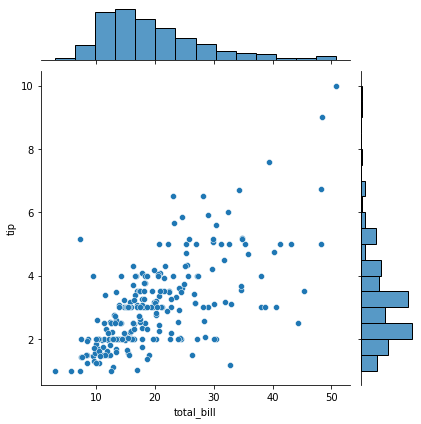

In [153]:
sns.jointplot(x = tips['total_bill'],y = tips['tip'])

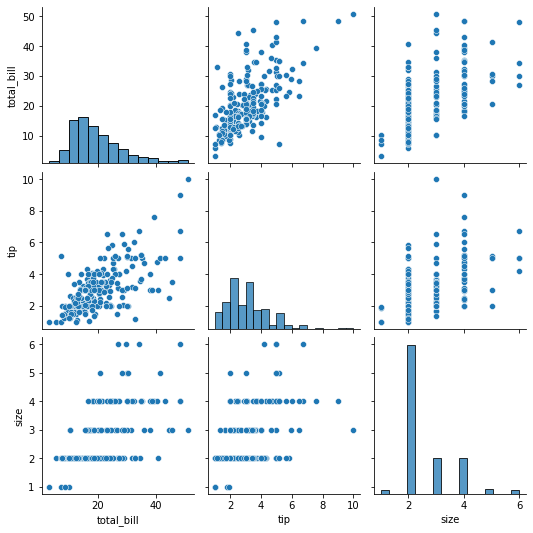

In [154]:
sns.pairplot(tips)

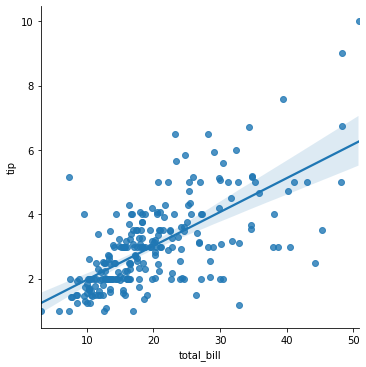

In [155]:
sns.lmplot(x='total_bill',y ='tip', data=tips)

In [156]:
y = tips['tip']
X = tips[['total_bill', 'size']].values.reshape(-1, 2)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [158]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [159]:
lm.fit(X_train, y_train)

LinearRegression()

In [160]:
print(lm.coef_)

[0.10444841 0.14976142]


In [161]:
predictions = lm.predict(X_test)

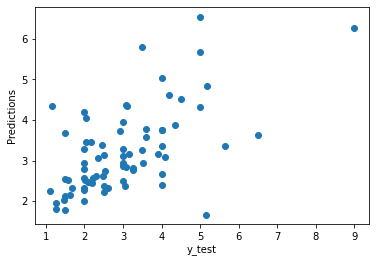

In [162]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.show()

In [163]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8303922974709628
MSE: 1.2873556796674925
RMSE: 1.1346169748719135


C:\Users\tilak\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

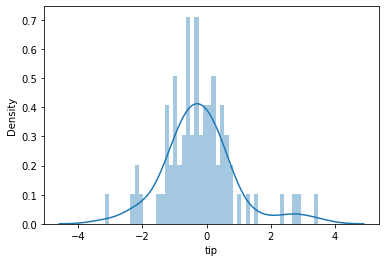

In [164]:
sns.distplot((y_test-predictions),bins=50)